# Bank's client Outreach - EDA & Modeling Excercise

## Introduction

This dataset stores client data of a bank.

The bank wishes to know which of its customers would take out a fixed term savings account to streamline which customers to approach.

This dataset contains 15 predictor variables:

    •	age: customer age
    •	job: job
    •	marital: marital status
    •	education
    •	default :  has defaulted on credit in the past
    •	housing : has a mortgage
    •	loan : has a personal loan
    •	contact : communication type
    •	month: month in which communication last took place with the customer, 
    •	day_of_week: the day of the week that communication last took place
    •	duration : how long the call was (in seconds)
    •	campaign : the number of time they were contacted during the last marketing campaign
    •	pdays : number of days since the customer was last contacted (999 means they haven’t ever been contacted)
    •	previous : number of times the customer was contacted before the last marketing campaign
    •	poutcome : and the outcome of the previous marketing campaign.

And target variable named "y" which shows "yes" or "no" values, depending on whether client has previously taken the fixed term savings account offer.

This problem can be modelled using supervised learning strategies, in particular classification algorithms.
My assumption is that the cost of client contact is low, therefore the bank would look to prioritise high recall for the positive class. I will loo to maximise this performance measure, while ensuring accuracy and precision remain at a high level also.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd
 
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
        path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
        print("Saving figure", fig_id)
        if tight_layout:
            plt.tight_layout()
        plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
df=pd.read_csv('Dataset/dataset.csv')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


In [3]:
#Suppress warnings for a clean jupyter notebook. Errors will still show.
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


Attribute name:  age

31    1551
32    1474
33    1443
35    1417
34    1404
      ... 
17       3
89       2
91       1
87       1
98       1
Name: age, Length: 75, dtype: int64




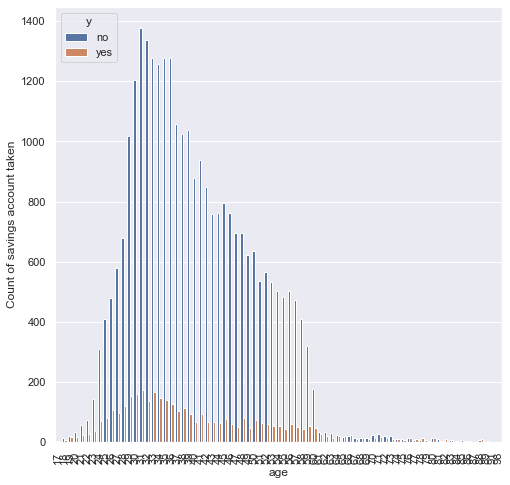

Attribute name:  job

admin.           8314
blue-collar      7441
technician       5400
services         3196
management       2345
retired          1366
entrepreneur     1160
self-employed    1099
housemaid         855
unemployed        798
student           711
unknown           265
Name: job, dtype: int64




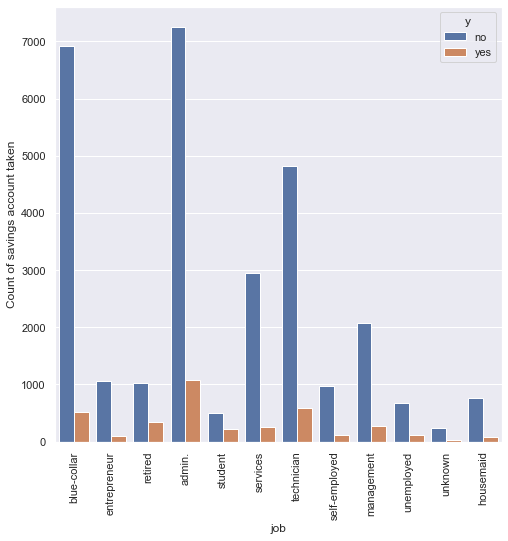

Attribute name:  marital

married     19953
single       9257
divorced     3675
unknown        65
Name: marital, dtype: int64




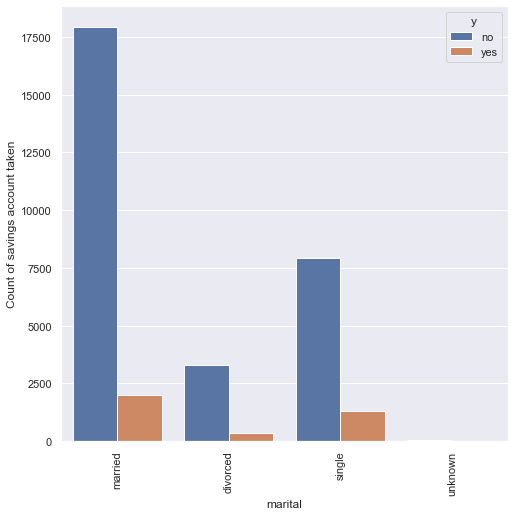

Attribute name:  education

university.degree      9736
high.school            7596
basic.9y               4826
professional.course    4192
basic.4y               3322
basic.6y               1865
unknown                1397
illiterate               16
Name: education, dtype: int64




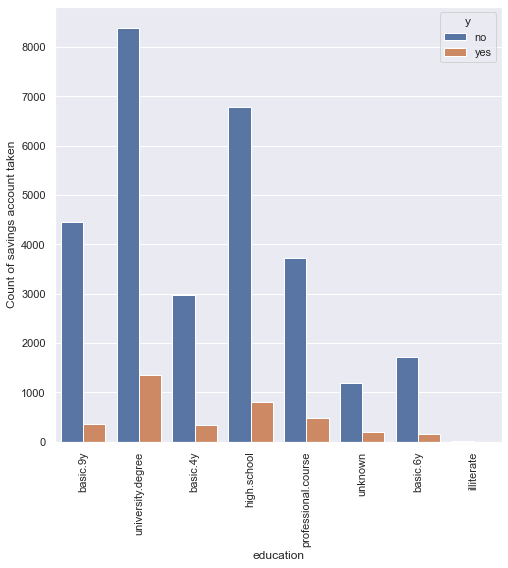

Attribute name:  default

no         26007
unknown     6940
yes            3
Name: default, dtype: int64




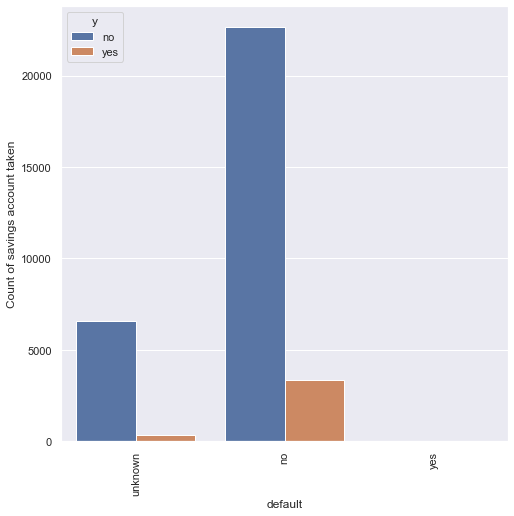

Attribute name:  housing

yes        17254
no         14900
unknown      796
Name: housing, dtype: int64




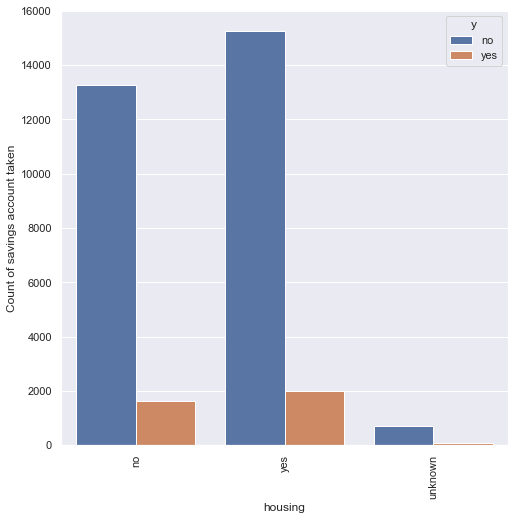

Attribute name:  loan

no         27131
yes         5023
unknown      796
Name: loan, dtype: int64




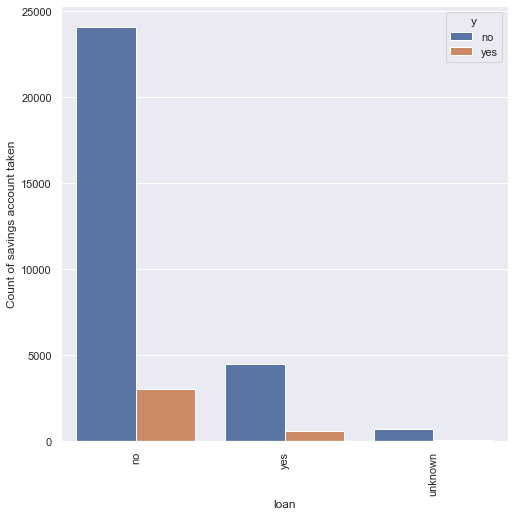

Attribute name:  contact

cellular     20908
telephone    12042
Name: contact, dtype: int64




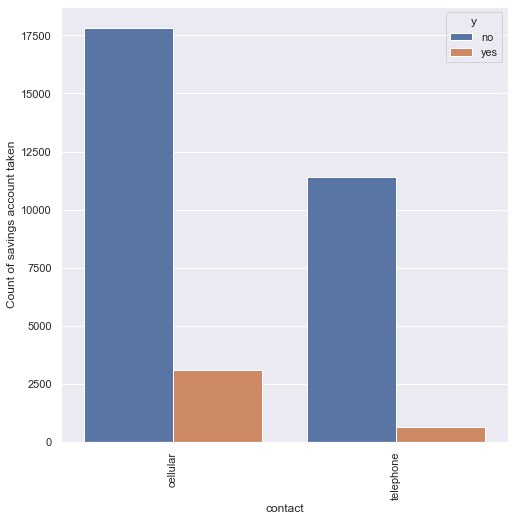

Attribute name:  month

may    11011
jul     5763
aug     4948
jun     4247
nov     3266
apr     2085
oct      587
sep      464
mar      436
dec      143
Name: month, dtype: int64




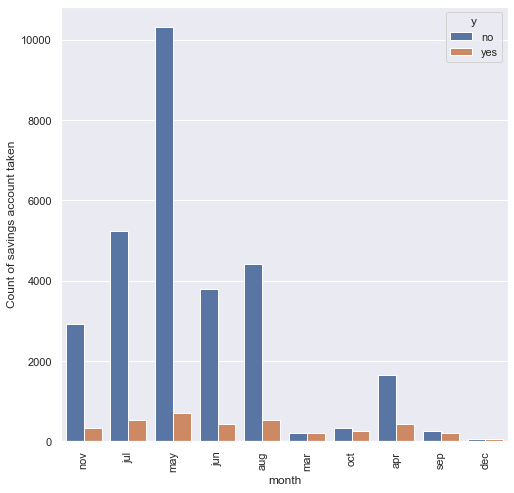

Attribute name:  day_of_week

thu    6857
mon    6812
wed    6515
tue    6444
fri    6322
Name: day_of_week, dtype: int64




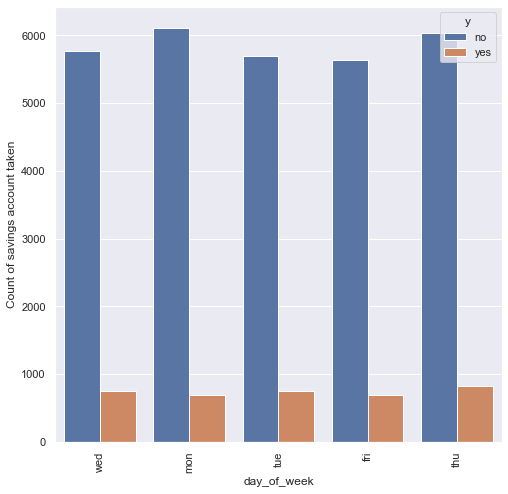

Attribute name:  duration

90      147
124     139
136     138
85      137
82      133
       ... 
1098      1
1258      1
1290      1
1514      1
2015      1
Name: duration, Length: 1467, dtype: int64




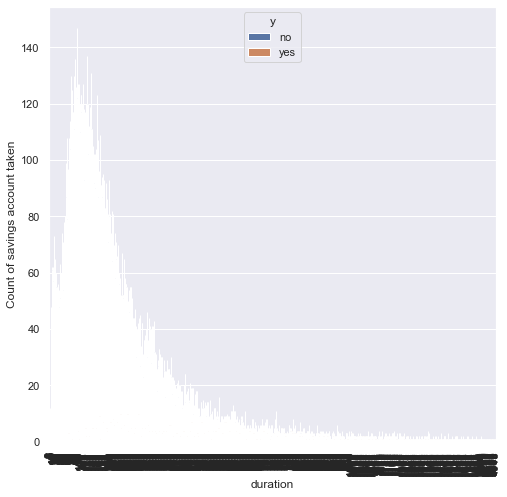

Attribute name:  campaign

1     14121
2      8469
3      4300
4      2116
5      1255
6       773
7       493
8       329
9       220
10      187
11      142
12       92
13       74
14       52
17       51
15       45
16       42
18       27
20       22
21       20
19       16
22       13
24       12
23       12
27        9
25        8
26        7
29        7
31        7
28        6
30        6
35        4
33        3
43        2
42        2
32        2
40        1
56        1
37        1
34        1
Name: campaign, dtype: int64




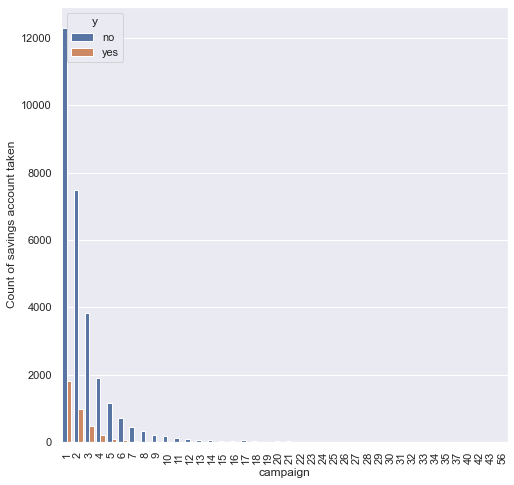

Attribute name:  pdays

999    31724
3        355
6        337
4         97
2         52
7         47
9         45
10        43
12        40
5         40
13        28
1         22
15        21
11        21
14        18
8         14
0         12
16         9
17         8
18         6
22         3
19         2
21         2
20         1
25         1
26         1
27         1
Name: pdays, dtype: int64




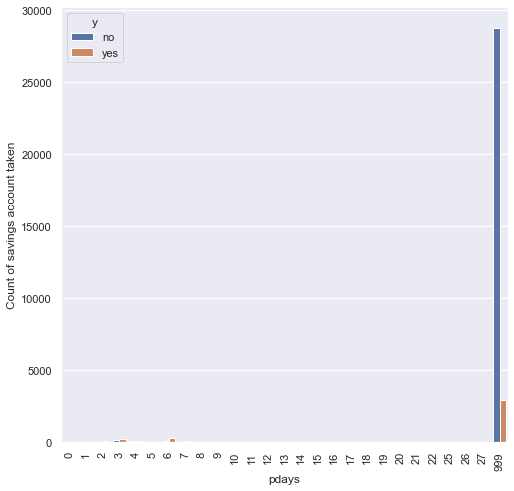

Attribute name:  previous

0    28416
1     3673
2      606
3      175
4       60
5       14
6        5
7        1
Name: previous, dtype: int64




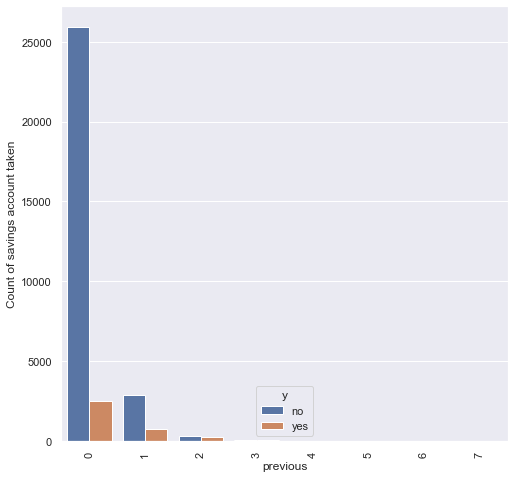

Attribute name:  poutcome

nonexistent    28416
failure         3429
success         1105
Name: poutcome, dtype: int64




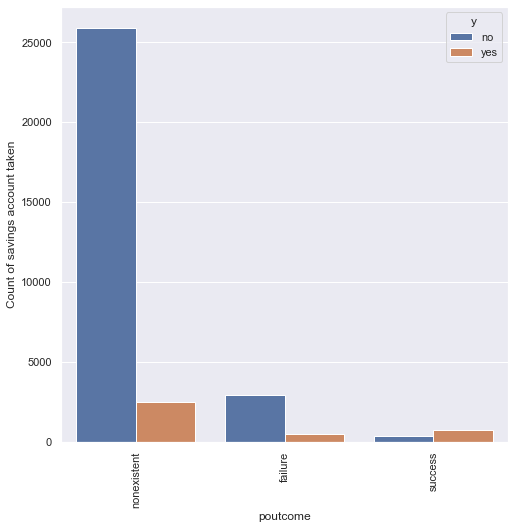

In [5]:
%matplotlib inline
sns.set(rc={'figure.figsize':(8,8)})
for col in df.drop("y", axis =1).columns:
    print("Attribute name: ", col)
    print("")
    print(df[col].value_counts())
    print("")
    print("")
    sns.countplot(data=df ,x=col, hue=df.y)
    plt.ylabel('Count of savings account taken')
    plt.xticks(rotation=90)
    plt.show()

<AxesSubplot:xlabel='y', ylabel='count'>

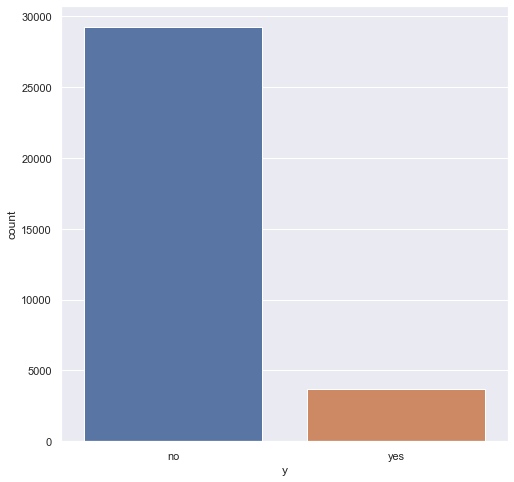

In [6]:
sns.countplot(df.y)

In [7]:
#checking the % of "yes" target variable values in the dataset
np.sum(df["y"]=="yes")/len(df)

0.11265553869499241

### Initial Observations

1. The dataset is imbalanced, with only 11.3% of all instances being associated with the positive class
2. There are no null values, however most of the categorical variables contain the "unknown" class

Unknown class values are left, without attempt being made at filling these values - as would be the case with NaN/Null entries.
This is because the "unknown" class may carry signal across some or all of the variables.

3. It is difficult to draw firm conclusions from the countplots, as y-axis is not normalised. In comparing the bar graps of each category value, and their split between positive and negative class, the following possible correlations transpire:

- customer job "retired" or "student" relates to higher likelihood of account uptake
- successful outcome of the previous marketing campaing relates to higher likelihood of account uptake
- Customers contacted in March, October, Spetember and December may be more likely to sign up for the account

4. There are 11 predictor features which are categorical variables, and will require encoding to enable further analysis.

## Dealing with dataset imbalance - undersampling

The issue of class imbalance is important to deal with, especially as I am looking to identify an effective binary classifier.
Any bias inherent to the dataset will undully afect the classifier's performance - usually causing high accuracy, without correspondingly satisfying precision and recall scores.

To address the issue of dataset imbalance, I have used a technique known as "undersampling."
The key idea behind the technique is to count the number of instances corresponding to the minority class.
Then draw an equal number of instances from the majority class. Finally concatenate both into a new dataframe.

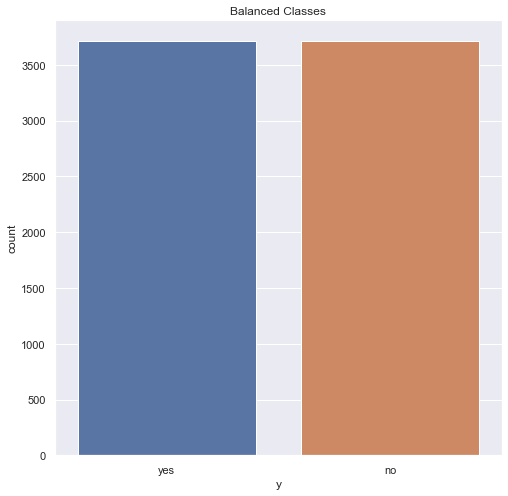

In [8]:
# Shuffle the Dataset.
shuffled_df = df.sample(frac=1,random_state=42)

#check for the number of rows where y=="yes"

yes_count = np.sum(df["y"]=="yes")

# Put all the y=="yes" class in a separate dataset.
yes = shuffled_df.loc[shuffled_df["y"] == "yes"]

#Randomly select equal number of observations from the majority class (y=="no")
no = shuffled_df.loc[shuffled_df["y"] == "no"].sample(n=yes_count,random_state=42)
 
# Concatenate both dataframes again
df_normalised = pd.concat([yes, no])
 
#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot(df_normalised.y, data=df_normalised)
plt.title('Balanced Classes')
plt.show()

## Encoding categorical features

I initally attempted variable encoding via OneHotEncoder, through embedding it as part of data transformation pipeline.
Unfortunately I did not find this method useful as:

1) Pipeline output was a sparse matrix, which at best could be made into a numpy array. This meant column names were lost, and a meaningul look at correlations between variables was made impossible.

2) Unfortunately the test set data contained additional variable classes, which broke the pipeline.

3) Additional layer of complication introduced when trying to prevent encoding for some of the categories. 

I decided to use pandas inbuilt "get_dummies" method. This allowed for:

1) Easily passing in category names that needed encoding
2) Generation of pandas dataframe with clear column names for each encoded category

In [9]:
#dummy encode categorical variables
df_encoded = pd.get_dummies(data=df_normalised,columns=['job','marital','education','default','housing','loan','contact','month', 'day_of_week' ,'poutcome', 'y'])
#retaining unencoded target variable
df_encoded["y"] = df["y"]
df_encoded.head()

,age,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes,y
17730,29,255,1,3,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,yes
5332,58,477,1,999,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,yes
6948,72,207,8,999,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,yes
25330,64,232,1,999,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,yes
5754,28,1064,4,999,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,yes


## Investigating correlations between variables

<AxesSubplot:>

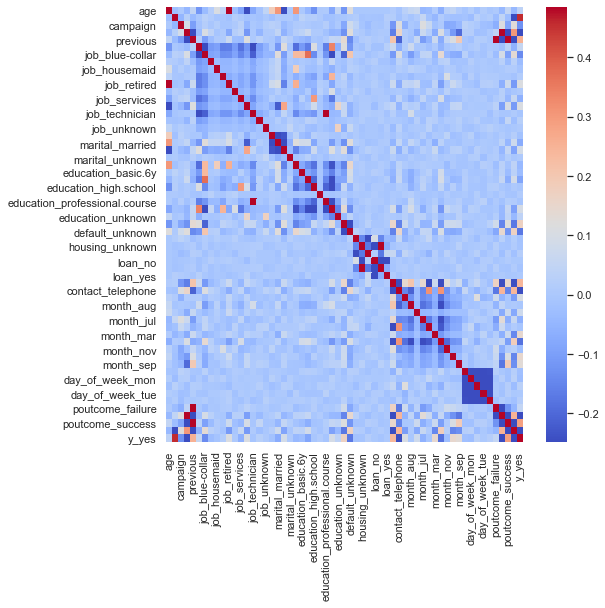

In [10]:
#check correlations between variables
corr=df_encoded.corr()

#plotting heatmap based on correlation matrix between encoded variables, cmap defines prefered visual style and roboust adjusts contrast
sns.heatmap(corr, cmap='coolwarm', robust=True)

#due to a high number of variables, it is a little tricky to interpret the output, but it looks like there are multicolinearity issues
# between job_retired and age (makes sense!) as well as education_professional,course and job.technician
# as well as other variables

In [11]:
#check for strongest correlation between y="yes" and other variables
corr["y_yes"].sort_values(ascending=False)

y_yes                            1.000000
duration                         0.457896
poutcome_success                 0.289096
previous                         0.253151
contact_cellular                 0.242738
default_no                       0.172135
month_oct                        0.148741
month_mar                        0.144590
month_sep                        0.132514
job_retired                      0.110463
job_student                      0.107994
month_apr                        0.103255
education_university.degree      0.095158
marital_single                   0.089289
month_dec                        0.078147
job_admin.                       0.057208
poutcome_failure                 0.050304
education_unknown                0.040674
age                              0.039091
day_of_week_thu                  0.031138
job_unemployed                   0.024838
day_of_week_wed                  0.019717
housing_yes                      0.019156
job_management                   0

In [12]:
#check this using absolute value, to incorporate negative correlation
abs(corr["y_yes"]).sort_values(ascending=False)

y_yes                            1.000000
y_no                             1.000000
duration                         0.457896
pdays                            0.302075
poutcome_success                 0.289096
previous                         0.253151
poutcome_nonexistent             0.252006
contact_telephone                0.242738
contact_cellular                 0.242738
month_may                        0.182502
default_no                       0.172135
default_unknown                  0.172135
month_oct                        0.148741
month_mar                        0.144590
job_blue-collar                  0.138455
month_sep                        0.132514
campaign                         0.127196
job_retired                      0.110463
job_student                      0.107994
month_apr                        0.103255
education_university.degree      0.095158
marital_single                   0.089289
education_basic.9y               0.085485
month_dec                        0

### Findings

As previously mentioned, I observed

1. Multicollinearity issues between several predictor variables.
2. Positive class most correlated to (top 3):

        - duration                     
        - pdays                  
        - poutcome_success
        
3. Several mid to high correlations between predictors and target indicate a good likelihood of my being able to build a successful model for this problem.


## Train Test Split and data transformation

In [13]:
df_final_before_split =df_encoded.drop(["y_yes", "y_no"],axis=1)

In [14]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_final_before_split, test_size=0.2, random_state=42)
X_train = train_set.drop("y", axis=1)
Y_train = train_set.y

X_test = test_set.drop("y", axis =1)
Y_test = test_set.y

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
 
# variance threshold assists with feature selection, so only features that contribute to variance are chosen
# standard scaler standardises all columns
# PCA further reduces the size of the dataset for quicker processing when modelling
# it also acts to eliminate multicollinearity
 
pipeline = Pipeline([
    ('feature_selection', VarianceThreshold()),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components = 0.95))])

X_train_post_pipeline = pipeline.fit_transform(X_train)
X_test_post_pipeline = pipeline.transform(X_test)

# Binary Classifiers

Binary classifier selection follows the same pattern for all classifiers included.
Initially a classifier is chosen and hyperparameter tunning is performed to find th ebest estimator.

Once obtaine, the classifier is tested for accuracy, precision, recall and f1 score.
For each classifier a confusion matrix is also produced.

Finally each classifier is followed by a short analysis of performance.

## KNN

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': range(2,9)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True)
grid.fit(X_train_post_pipeline, Y_train)
grid.cv_results_


{'mean_fit_time': array([0.00518579, 0.00671449, 0.00398898, 0.00439563, 0.00438309,
        0.0031908 , 0.00698609]),
 'std_fit_time': array([1.46511007e-03, 4.47563285e-03, 1.50789149e-07, 4.82254927e-04,
        4.82357331e-04, 1.59540208e-03, 5.49549055e-03]),
 'mean_score_time': array([0.12865553, 0.14143219, 0.1470068 , 0.15208683, 0.14900236,
        0.15622959, 0.15916905]),
 'std_score_time': array([0.00679313, 0.01270065, 0.00794385, 0.00864712, 0.00709656,
        0.01003106, 0.01719018]),
 'param_n_neighbors': masked_array(data=[2, 3, 4, 5, 6, 7, 8],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5},
  {'n_neighbors': 6},
  {'n_neighbors': 7},
  {'n_neighbors': 8}],
 'split0_test_score': array([0.66666667, 0.69612795, 0.69360269, 0.71296296, 0.71296296,
        0.71885522, 0.71548822]),
 'split1_test_score':

In [17]:
grid.best_params_

{'n_neighbors': 7}

In [18]:
knn = grid.best_estimator_
print('Train accuracy: {}'.format(knn.score(X_train_post_pipeline, Y_train)))
print('Test accuracy: {}'.format(knn.score(X_test_post_pipeline, Y_test)))

Train accuracy: 0.8051860582589662
Test accuracy: 0.7218855218855219


              precision    recall  f1-score   support

          no       0.70      0.77      0.73       731
         yes       0.75      0.67      0.71       754

    accuracy                           0.72      1485
   macro avg       0.72      0.72      0.72      1485
weighted avg       0.73      0.72      0.72      1485



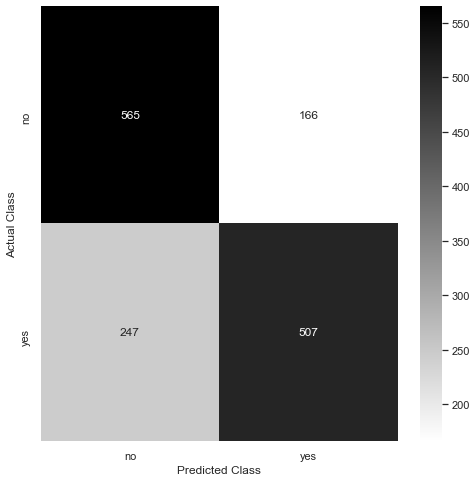

In [19]:
# Display various performance measures.
from sklearn.metrics import confusion_matrix, classification_report

y_pred = knn.predict(X_test_post_pipeline)
print(classification_report(Y_test, y_pred))
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='1', xticklabels=knn.classes_, yticklabels=knn.classes_, cmap='binary')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

### KNN Performance

This classifier achieves 80.5% accuracy on the test set, which falls down to 72.2% on test.
Thanks to undersampling, the classifier performs similarly well in terms of precision, recall and f1-score for both classes.

There is unfortunately a high ratio of false negatives. About 32.7% of all positive class instances are misclassified as negative.
This is of course reflected in relatively poor recall score for the positive class at 0.67.

The train set shows a small bias towards positive class (754 instances), however this should not impact model's performance significantly.

## Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier

np.random.seed(2)
param_grid = {'max_depth': range(1,20), 'criterion':['gini', 'entropy']}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True)
grid.fit(X_train_post_pipeline, Y_train)
grid.cv_results_

{'mean_fit_time': array([0.02513247, 0.03810406, 0.05744381, 0.07578869, 0.08975873,
        0.09953995, 0.11469169, 0.12437606, 0.13763313, 0.14632583,
        0.15677972, 0.16388621, 0.17484293, 0.18201895, 0.20245323,
        0.18631949, 0.19148293, 0.19209628, 0.19367423, 0.03271461,
        0.06262474, 0.08995304, 0.11440835, 0.14121957, 0.16567364,
        0.183813  , 0.20316157, 0.21697779, 0.23098044, 0.24126787,
        0.24414816, 0.26947064, 0.2534204 , 0.25473475, 0.2564177 ,
        0.25731068, 0.25431967, 0.25743361]),
 'std_fit_time': array([0.00642865, 0.00039643, 0.00619587, 0.01249037, 0.00873212,
        0.00409742, 0.00492087, 0.00543225, 0.00539628, 0.00493965,
        0.00614995, 0.00447992, 0.00439052, 0.00440121, 0.02056437,
        0.00366911, 0.00852993, 0.00685189, 0.00694717, 0.00039996,
        0.00509859, 0.00497572, 0.0048673 , 0.00646702, 0.00883308,
        0.00534928, 0.01001959, 0.00727125, 0.00757003, 0.00887656,
        0.00630725, 0.02043461, 0.009

In [21]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 7}

In [22]:
tree = grid.best_estimator_
print('Train accuracy: {}'.format(tree.score(X_train_post_pipeline, Y_train)))
print('Test accuracy: {}'.format(tree.score(X_test_post_pipeline, Y_test)))

Train accuracy: 0.8285906718302745
Test accuracy: 0.7696969696969697


              precision    recall  f1-score   support

          no       0.75      0.79      0.77       731
         yes       0.79      0.75      0.77       754

    accuracy                           0.77      1485
   macro avg       0.77      0.77      0.77      1485
weighted avg       0.77      0.77      0.77      1485



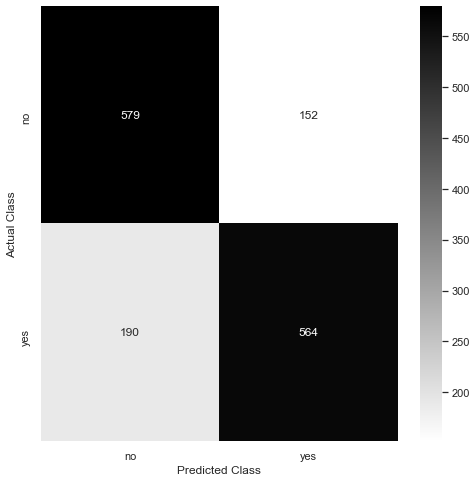

In [23]:
y_pred = tree.predict(X_test_post_pipeline)
print(classification_report(Y_test, y_pred))
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='1', xticklabels=tree.classes_, yticklabels=tree.classes_, cmap='binary')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

### Decision Tree performance

The decision tree model shows improved performance on both train and test sets, with accuracy of 82.9% and 77% correspondigly.
There is a significant improvement in terms of recall against the positive class (0.79), and average scores across all performance measures, for both classes are in the thigh 70s (%).

## SVC - Linear Kernel

In [24]:
from sklearn.svm import SVC

np.random.seed(1)
param_grid = [{'kernel':['linear'], 'C':[0.01, 0.1, 1, 10]}]
grid = GridSearchCV(SVC(probability=True, max_iter=100), param_grid, cv=5, return_train_score=True)
grid.fit(X_train_post_pipeline, Y_train)
grid.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [25]:
svm1 = grid.best_estimator_
print('Train accuracy: {}'.format(svm1.score(X_train_post_pipeline, Y_train)))
print('Test accuracy: {}'.format(svm1.score(X_test_post_pipeline, Y_test)))

Train accuracy: 0.5874726384913285
Test accuracy: 0.5952861952861953


              precision    recall  f1-score   support

          no       0.71      0.30      0.42       731
         yes       0.57      0.88      0.69       754

    accuracy                           0.60      1485
   macro avg       0.64      0.59      0.56      1485
weighted avg       0.64      0.60      0.56      1485



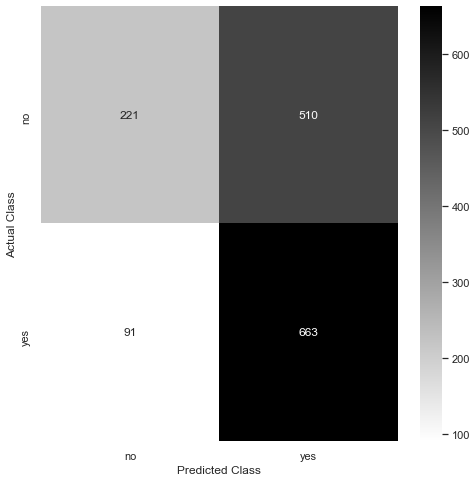

In [26]:
y_pred = svm1.predict(X_test_post_pipeline)
print(classification_report(Y_test, y_pred))
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='1', xticklabels=tree.classes_, yticklabels=tree.classes_, cmap='binary')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

### SVC Linear performance

This model represents a significant drop in accuracy compared to both KNN and Decision Trees.
Accuracy falls under 60% on both test and train sets, and so do average precision, recall and F-1 scores.

However, interestingly, this model is very successful at capturing positive class - with a correspondingly high rate of recall for this class - of 0.88. This is 13% higher than Decision Tress and 21% better than KNN.

As mentioned in the introduction, the assumption is the bank are interested in high recall so they can enroll the largest possible number of customers onto their fixed term savings account.

## SVC Rbf

In [27]:
np.random.seed(1)
param_grid = [{'kernel':['rbf'], 'C':[0.01, 0.1, 1, 10], 'gamma':[0.01, 0.1, 1, 10]}]
grid = GridSearchCV(SVC(probability=True, max_iter=100), param_grid, cv=5, return_train_score=True)
grid.fit(X_train_post_pipeline, Y_train)
grid.best_params_
# grid.cv_results_
svm2 = grid.best_estimator_
print('Train accuracy: {}'.format(svm2.score(X_train_post_pipeline, Y_train)))
print('Test accuracy: {}'.format(svm2.score(X_test_post_pipeline, Y_test)))

Train accuracy: 0.6748610877252063
Test accuracy: 0.6363636363636364


              precision    recall  f1-score   support

          no       0.63      0.62      0.63       731
         yes       0.64      0.66      0.65       754

    accuracy                           0.64      1485
   macro avg       0.64      0.64      0.64      1485
weighted avg       0.64      0.64      0.64      1485



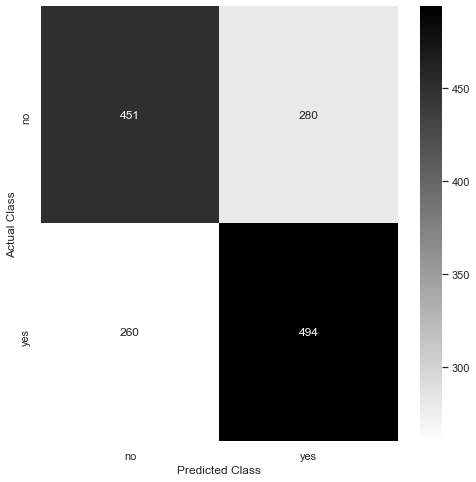

In [28]:
y_pred = svm2.predict(X_test_post_pipeline)
print(classification_report(Y_test, y_pred))
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='1', xticklabels=tree.classes_, yticklabels=tree.classes_, cmap='binary')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

### SVC Rbf performance

Support Vector Machines with 'rbf' kernel shows a much more even-keeled performance across all measures and classes.
Train set accuracy reaches 67.5%, and test set's 63.3%. Precision, recall and f1 scores for both classes look to sit between these values, with average value of 0.64.

## Random Forest

In order to carry out hyperparameter tuning for Random Forest classifier, I am first looking to identify the parameters that go into this classifier.

In the process of completing this exam I have tried tuning up to three parameters for Random Forest - however the algorithm could not finish running. For instance, I looked to adjust maximum depth of the individual trees to improve the model - but this was not feasible with limited time and computational power.

Therefore I eventually "settled" on just n_estimator, and within a short range of 95 to 105.
The default number of estimator is 100, therefore I have just slightly expanded on that setting to find the best fit for data.

In [29]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [30]:
np.random.seed(1)

#looking the key parameters for random forest, n_estimators which gives the number of decision trees in the forest

param_grid = [{'n_estimators': range(95,105) }]
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, return_train_score=True)
grid.fit(X_train_post_pipeline, Y_train)
grid.best_params_

{'n_estimators': 101}

In [31]:
rf = grid.best_estimator_
print('Train accuracy: {}'.format(rf.score(X_train_post_pipeline, Y_train)))
print('Test accuracy: {}'.format(rf.score(X_test_post_pipeline, Y_test)))

Train accuracy: 1.0
Test accuracy: 0.8282828282828283


              precision    recall  f1-score   support

          no       0.84      0.80      0.82       731
         yes       0.82      0.85      0.83       754

    accuracy                           0.83      1485
   macro avg       0.83      0.83      0.83      1485
weighted avg       0.83      0.83      0.83      1485



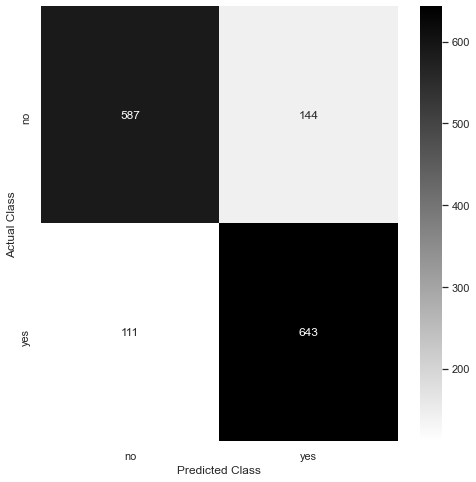

In [32]:
y_pred = rf.predict(X_test_post_pipeline)
print(classification_report(Y_test, y_pred))
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='1', xticklabels=tree.classes_, yticklabels=tree.classes_, cmap='binary')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

### Random Forest performance

It is fairly common for Random Forest to overfit the data, and this seems to be the case here with 100% accuracy performance on the train set. However the classifier also performs well on the unseen data, with 82.8 test accuracy - the higest so far.

Performance scores are also more or less evenly distributed across classes and metrics, in the range from low to mid 80s (80%), with average scores of 0.83.

Although recall for the positve class is very good at 0.85 - it still does not match what Support Vector Machines classifier achieved with linear kernel. Apart from that, Random Forrest shows an improvement of every other model tested so far, on every performance measure.

# Ensamble learning

In order to further optimise the model, I will employ ensamble learning.
A soft voting classifier will take input from three binary classifiers, as shown above.

The tree classifiers selected are:

        -svm1 : Support Vector Machines with linear kernel - to capitalise on high positive class recall
        -tree : Decision Tree - second best performing model to ensure precision and accuracy don't suffer
        -rf : Best performing model, as above
        
It is important to select diverse algorithms that make different types of mistakes, so one can compensate where the other is lacking. In this case, Decision Tress and Random Forest are similar in nature (rf is an ensamble of decision trees) however a voting classifier with poorer performing sub-classifiers would very likely deliver weak predictive performance.

In [33]:
from sklearn.ensemble import VotingClassifier
ensemble_clf = VotingClassifier(estimators=[('svm1', svm1), ('tree', tree), ('rf', rf)],voting='soft')
ensemble_clf.fit(X_train_post_pipeline, Y_train)
print('Train accuracy: {}'.format(ensemble_clf.score(X_train_post_pipeline, Y_train)))
print('Test accuracy: {}'.format(ensemble_clf.score(X_test_post_pipeline, Y_test)))

Train accuracy: 0.939888870180165
Test accuracy: 0.8013468013468014


              precision    recall  f1-score   support

          no       0.84      0.74      0.79       731
         yes       0.77      0.86      0.81       754

    accuracy                           0.80      1485
   macro avg       0.81      0.80      0.80      1485
weighted avg       0.81      0.80      0.80      1485



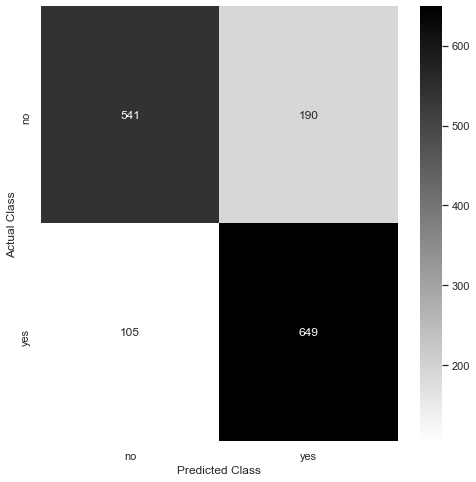

In [34]:
y_pred = ensemble_clf.predict(X_test_post_pipeline)
print(classification_report(Y_test, y_pred))
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='1', xticklabels=tree.classes_, yticklabels=tree.classes_, cmap='binary')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

In [35]:
params = {'weights':[[1,1,1],[1,2,1],[2,1,1],[1,1,2],[2,2,1],[2,1,2],[1,2,2]]}

grid = GridSearchCV(estimator=ensemble_clf, param_grid=params, cv=5, return_train_score=True)
grid = grid.fit(X_train_post_pipeline, Y_train)

In [36]:
grid.best_params_

{'weights': [1, 1, 2]}

In [37]:
ensemble_clf_best = grid.best_estimator_
print('Train accuracy: {}'.format(ensemble_clf_best.score(X_train_post_pipeline, Y_train)))
print('Test accuracy: {}'.format(ensemble_clf_best.score(X_test_post_pipeline, Y_test)))

Train accuracy: 0.9715440309816468
Test accuracy: 0.8161616161616162


              precision    recall  f1-score   support

          no       0.85      0.76      0.80       731
         yes       0.79      0.87      0.83       754

    accuracy                           0.82      1485
   macro avg       0.82      0.82      0.82      1485
weighted avg       0.82      0.82      0.82      1485



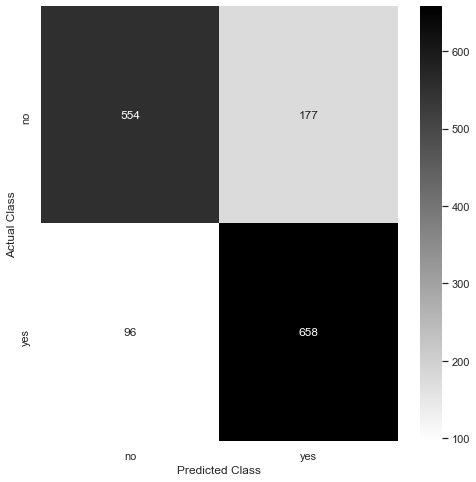

In [38]:
y_pred = ensemble_clf_best.predict(X_test_post_pipeline)
print(classification_report(Y_test, y_pred))
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='1', xticklabels=tree.classes_, yticklabels=tree.classes_, cmap='binary')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

### Ensamble learning performance

Ensamble learning is successful in delivering a model of similar accuracy to the best individual model - Random Forest.
However, it also deliveres a very high recall for the positive class - only 1% lower than SVC Linear, while retaining average precision, recal and f-1 scores at 0.82 for the test set.

The first iteration of the ensambling classifier was less successful - however hyperparameter tuning proved really beneficial here. The best combination of weights per classifier was found at [1, 1, 2] with presumably the higher weight being allocated to Random Forrest (third in the classifier list.) 

# Conclusion 

This was a large dataset, highly biased towards the negative class. After some initial experimentation, I knew I had to plan this excercise carefully not to get stuck at any point. I looked to eliminate the dataset imbalance via undersampling, and further reduce the dataset's volume through feature selection and PCA as employed via the data transformation pipeline. EDA informed this process greatly.

The excercise required training of a binary classifier, including hyperparameter tuning for each chosen model, checking of classifier performance metrics, and eventual selection of the best classifier considering the client's (bank) requirements.

I have applied four machine learning algorithms (K-Nearest Neighboursm Support Vector Machines, Decision Tree, and Random Forrest classifiers) and an ensemble method which incorporated some of these (DT, SVM, RF). The best performing classifier was Random Forest, followed by Decision Tree and KNN. However I chosen SVM with linear kernel for incorporation into the ensemble method, due to its high recall for positive class. 



After running the ensamble classifier, I improved it via grid search - to find the best combination of weights for the sub-classifiers. The ensemble classifier didn't perform quite as well as the best individual classifier in terms of accuracy or precision - however it still achieved high average scores across both classes. It also offered a high recall rate for positive class - of 87%. 

Under the assumption that the bank are looking to maximise their chance of enrolling a customer into the fixed term savings account, and thus placing higher value on positive class recall, I would recommend the bank use the final ensamble model.